In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetest_dataset = load_diabetes()
print(diabetest_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
# Save the input and target variables

print(diabetest_dataset.keys())
data = diabetest_dataset.get("data")
targets = diabetest_dataset.get("target")

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [6]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0))/targets.std()
targets


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [8]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,targets,test_size=0.1)

#### Train a feedforward neural network model

In [10]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128,activation="relu",input_shape=(train_data.shape[1],)),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(1)
        
    ])
    return model

model = get_model()

In [11]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [12]:
# Compile the model

model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [13]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data,train_target,epochs=100,validation_split=0.15,batch_size=64,verbose=False)

In [16]:
# Evaluate the model on the test set

model.evaluate(test_data,test_target,verbose=False)

[1.1641257286071778, 0.8098618]

#### Plot the learning curves

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

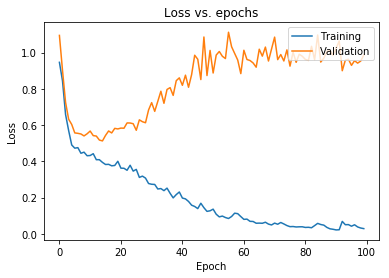

In [18]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [26]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [27]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5,0.3)

In [28]:
# Compile the model

model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [29]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data,train_target,epochs=100,validation_split=0.15,batch_size=64,verbose=False)

In [30]:
# Evaluate the model on the test set

model.evaluate(test_data,test_target,verbose=False)

[0.6829511271582709, 0.6679862]

#### Plot the learning curves

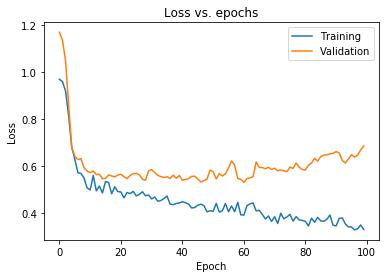

In [31]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [36]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback
class TrainingCallback(Callback):
    def on_train_begin(self,logs=None):
        print("starting training")
    def on_epoch_begin(self,epoch,logs=None):
        print("on epoch begin")
    
    def on_train_batch_begin(self,batch,logs=None):
        print("starting training batch")
    def on_train_batch_end(self,batch,epoch,logs=None):
        print("Finished batch")
    

In [37]:
# Re-build the model
model = get_regularised_model(1e-5,0.3)


In [38]:
# Compile the model
model.compile(optimizer="adam",loss="mse",metrics=["mae"])


#### Train the model with the callback

In [39]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data,train_target,epochs=3,validation_split=0.15,batch_size=128,verbose=False,callbacks=[TrainingCallback()])

starting training
on epoch begin
starting training batch
Finished batch
starting training batch
Finished batch
starting training batch
Finished batch
on epoch begin
starting training batch
Finished batch
starting training batch
Finished batch
starting training batch
Finished batch
on epoch begin
starting training batch
Finished batch
starting training batch
Finished batch
starting training batch
Finished batch


In [40]:
# Evaluate the model

model.evaluate(test_data,test_target,verbose=False)

[1.004295163684421, 0.81218904]

In [41]:
# Make predictions with the model

model.predict(test_data)

array([[-0.03360958],
       [-0.0202437 ],
       [-0.0122053 ],
       [-0.00868313],
       [-0.04765565],
       [ 0.00976817],
       [-0.02355399],
       [-0.00083664],
       [ 0.00540711],
       [-0.02069638],
       [ 0.01348944],
       [-0.02931318],
       [-0.03621428],
       [-0.02329987],
       [-0.02516934],
       [-0.04185867],
       [ 0.02055238],
       [-0.01846777],
       [ 0.02189345],
       [ 0.00075071],
       [ 0.01552867],
       [-0.02600854],
       [-0.0144764 ],
       [ 0.01362886],
       [ 0.01008467],
       [ 0.0085605 ],
       [-0.0434155 ],
       [ 0.01044262],
       [-0.00019377],
       [ 0.00401089],
       [ 0.02073205],
       [-0.04850908],
       [ 0.0010218 ],
       [-0.02401735],
       [ 0.01462073],
       [-0.02967951],
       [ 0.01373752],
       [ 0.00598958],
       [-0.03488224],
       [ 0.00856363],
       [ 0.00049181],
       [-0.00843599],
       [-0.01988862],
       [ 0.01252489],
       [-0.03511141]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [47]:
# Re-train the unregularised model
unregularized_model = get_model()
unregularized_model.compile(optimizer="adam",loss="mse")
unreg_history = unregularized_model.fit(train_data,train_target,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping()])


In [43]:
# Evaluate the model on the test set

unregularized_model.evaluate(test_data,test_target)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.6374047279357911

In [50]:
# Re-train the regularised model

regualarized_model = get_regularised_model(1e-8,0.2)
regualarized_model.compile(optimizer="adam",loss="mse")
reg_history = regualarized_model.fit(train_data,train_target,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])


In [51]:
# Evaluate the model on the test set


regualarized_model.evaluate(test_data,test_target)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.5894092294904921

#### Plot the learning curves

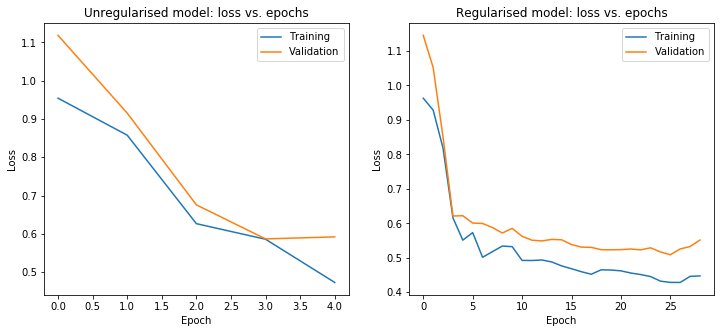

In [52]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()